In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Научимся сгружать все csv-шки

In [2]:
import pandas as pd
import glob
import os

# Specify the directory path
path = 'gdrive/MyDrive/CSV_for_econ/'

# Find all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Read each CSV file into a DataFrame
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
big_df = pd.concat(df_list, ignore_index=True)
big_df

,Unnamed: 0,propotion_of_iceberg,spred,depth_sum,volatitlity,sector
0,10,0.107460,1.886797e-07,11.0,8.374474e-07,0
1,11,0.011557,1.886797e-07,10.0,5.462705e-07,0
2,12,0.007421,1.886797e-07,10.0,4.615445e-07,0
3,13,0.036388,0.000000e+00,10.0,0.000000e+00,0
4,14,NaN,0.000000e+00,10.0,0.000000e+00,0
...,...,...,...,...,...,...
967,14,0.014608,1.767647e-04,1660.0,9.744257e-05,2
968,15,NaN,1.470588e-04,1618.0,4.767290e-05,2
969,16,0.031656,1.761765e-04,1667.0,7.275842e-05,2
970,17,NaN,2.058824e-04,1706.0,1.675717e-04,2


Сделам небольшой фича инженеринг: заванхотим категориальные фичи, сделаем норм название столбцов, наны уберем,

In [3]:
big_df.rename(columns={'Unnamed: 0': 'time'}, inplace=True)

big_df.head(2)

,time,propotion_of_iceberg,spred,depth_sum,volatitlity,sector
0,10,0.107460,1.886797e-07,11.0,8.374474e-07,0
1,11,0.011557,1.886797e-07,10.0,5.462705e-07,0


In [4]:
# One-hot encode column 'sector'
df_encoded = pd.get_dummies(big_df, columns=['sector'], dtype=float,  drop_first=True)

big_df = df_encoded
big_df

,time,propotion_of_iceberg,spred,depth_sum,volatitlity,sector_1,sector_2
0,10,0.107460,1.886797e-07,11.0,8.374474e-07,0.0,0.0
1,11,0.011557,1.886797e-07,10.0,5.462705e-07,0.0,0.0
2,12,0.007421,1.886797e-07,10.0,4.615445e-07,0.0,0.0
3,13,0.036388,0.000000e+00,10.0,0.000000e+00,0.0,0.0
4,14,NaN,0.000000e+00,10.0,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...
967,14,0.014608,1.767647e-04,1660.0,9.744257e-05,0.0,1.0
968,15,NaN,1.470588e-04,1618.0,4.767290e-05,0.0,1.0
969,16,0.031656,1.761765e-04,1667.0,7.275842e-05,0.0,1.0
970,17,NaN,2.058824e-04,1706.0,1.675717e-04,0.0,1.0


In [5]:
# df_encoded = pd.get_dummies(big_df, columns=['time'], dtype=float,  drop_first=True)
# big_df = df_encoded
# big_df

In [6]:
# пропуски должны быть 0-ми, у нас это нан - сделаем их 0

big_df = big_df.fillna(0)

big_df.head(5)

,time,propotion_of_iceberg,spred,depth_sum,volatitlity,sector_1,sector_2
0,10,0.107460,1.886797e-07,11.0,8.374474e-07,0.0,0.0
1,11,0.011557,1.886797e-07,10.0,5.462705e-07,0.0,0.0
2,12,0.007421,1.886797e-07,10.0,4.615445e-07,0.0,0.0
3,13,0.036388,0.000000e+00,10.0,0.000000e+00,0.0,0.0
4,14,0.000000,0.000000e+00,10.0,0.000000e+00,0.0,0.0


посмотрим как выглядят depth sum

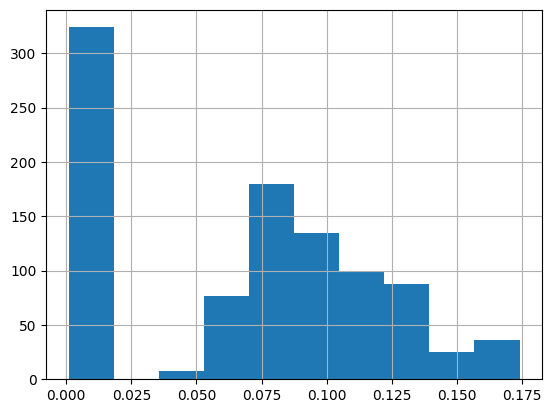

In [7]:
import matplotlib.pyplot as plt

big_df['depth_sum'] /= 10000
big_df['depth_sum'].hist()
plt.show()

In [8]:
# выкинем лишние столбцы
#big_df = big_df[big_df.columns.drop(['depth_sum'])]
#big_df.head(2)

In [9]:
# big_df['col_with_1'] = 1

# big_df.head(5)

In [10]:
# типо юнит тесты - чтобы посмотреть на y и x

In [11]:
big_df['propotion_of_iceberg']

0      0.107460
1      0.011557
2      0.007421
3      0.036388
4      0.000000
         ...   
967    0.014608
968    0.000000
969    0.031656
970    0.000000
971    0.000666
Name: propotion_of_iceberg, Length: 972, dtype: float64

In [12]:
big_df[big_df.columns.drop('propotion_of_iceberg')]

,time,spred,depth_sum,volatitlity,sector_1,sector_2
0,10,1.886797e-07,0.0011,8.374474e-07,0.0,0.0
1,11,1.886797e-07,0.0010,5.462705e-07,0.0,0.0
2,12,1.886797e-07,0.0010,4.615445e-07,0.0,0.0
3,13,0.000000e+00,0.0010,0.000000e+00,0.0,0.0
4,14,0.000000e+00,0.0010,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...
967,14,1.767647e-04,0.1660,9.744257e-05,0.0,1.0
968,15,1.470588e-04,0.1618,4.767290e-05,0.0,1.0
969,16,1.761765e-04,0.1667,7.275842e-05,0.0,1.0
970,17,2.058824e-04,0.1706,1.675717e-04,0.0,1.0


In [13]:
import statsmodels.api as sm

In [14]:
x = sm.add_constant(big_df[big_df.columns.drop('propotion_of_iceberg')])  # Add a constant term
model = sm.OLS(big_df['propotion_of_iceberg'], x).fit()  # Fit the OLS model

In [15]:
summary = model.summary()

In [16]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     propotion_of_iceberg   R-squared:                       0.067
Model:                              OLS   Adj. R-squared:                  0.061
Method:                   Least Squares   F-statistic:                     11.52
Date:                  Mon, 06 May 2024   Prob (F-statistic):           1.76e-12
Time:                          11:57:55   Log-Likelihood:                 1161.2
No. Observations:                   972   AIC:                            -2308.
Df Residuals:                       965   BIC:                            -2274.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0386      0.014      2.842      0.005       0.012       0.065
time           -0.0009      0.001     -0.932      0.352      -0.003       0.001
spred           0.0069      0.019      0.370      0.711      -0.030       0.044
depth_sum       0.5074      0.078      6.467      0.000       0.353       0.661
volatitlity     0.0062      0.020      0.312      0.755      -0.033       0.045
sector_1       -0.0404      0.008     -5.066      0.000      -0.056      -0.025
sector_2       -0.0352      0.009     -3.838      0.000      -0.053      -0.017
==============================================================================
Omnibus:                     1177.091   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           185708.858
Skew:                           5.977   Prob(JB):                         0.00
Kurtosis:                      69.652   Cond. No.                         483.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Сделаем всякие тесты

In [17]:
import statsmodels.stats.diagnostic as smd
resid = model.resid

# Perform the Breusch-Pagan test
lm_stat, lm_pvalue, f_stat, f_pvalue = smd.het_breuschpagan(resid, model.model.exog)

# Print the test results
print(f"Breusch-Pagan Test:")
print(f"LM Statistic: {lm_stat:.4f}")
print(f"LM p-value: {lm_pvalue:.4f}")
print(f"F Statistic: {f_stat:.4f}")
print(f"F p-value: {f_pvalue:.4f}")

Breusch-Pagan Test:
LM Statistic: 16.1630
LM p-value: 0.0129
F Statistic: 2.7197
F p-value: 0.0126


In [18]:
from statsmodels.stats.diagnostic import het_white

# Perform White's test for heteroskedasticity
white_test = het_white(model.resid, model.model.exog)

# Print the results of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 38.05332338905238, 'Test Statistic p-value': 0.034239120022609724, 'F-Statistic': 1.6077156826286834, 'F-Test p-value': 0.03263007725863491}


получается есть гетеростендандандантичность

Тогда запустим робастный метод

In [19]:
x = sm.add_constant(big_df[big_df.columns.drop('propotion_of_iceberg')])  # Add a constant term
model = sm.OLS(big_df['propotion_of_iceberg'], x).fit(cov_type='HC3')  # Fit the OLS model

In [20]:
summary = model.summary()

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     propotion_of_iceberg   R-squared:                       0.067
Model:                              OLS   Adj. R-squared:                  0.061
Method:                   Least Squares   F-statistic:                     54.87
Date:                  Mon, 06 May 2024   Prob (F-statistic):           2.38e-58
Time:                          11:57:56   Log-Likelihood:                 1161.2
No. Observations:                   972   AIC:                            -2308.
Df Residuals:                       965   BIC:                            -2274.
Df Model:                             6                                         
Covariance Type:                    HC3                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0386      0.015      2.565      0.010       0.009       0.068
time           -0.0009      0.001     -0.783      0.434      -0.003       0.001
spred           0.0069      0.013      0.525      0.599      -0.019       0.033
depth_sum       0.5074      0.091      5.563      0.000       0.329       0.686
volatitlity     0.0062      0.005      1.263      0.206      -0.003       0.016
sector_1       -0.0404      0.012     -3.371      0.001      -0.064      -0.017
sector_2       -0.0352      0.013     -2.667      0.008      -0.061      -0.009
==============================================================================
Omnibus:                     1177.091   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           185708.858
Skew:                           5.977   Prob(JB):                         0.00
Kurtosis:                      69.652   Cond. No.                         483.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [21]:
import statsmodels.stats.diagnostic as smd
resid = model.resid

# Perform the Breusch-Pagan test
lm_stat, lm_pvalue, f_stat, f_pvalue = smd.het_breuschpagan(resid, model.model.exog)

# Print the test results
print(f"Breusch-Pagan Test:")
print(f"LM Statistic: {lm_stat:.4f}")
print(f"LM p-value: {lm_pvalue:.4f}")
print(f"F Statistic: {f_stat:.4f}")
print(f"F p-value: {f_pvalue:.4f}")

Breusch-Pagan Test:
LM Statistic: 16.1630
LM p-value: 0.0129
F Statistic: 2.7197
F p-value: 0.0126


In [22]:
from statsmodels.stats.diagnostic import het_white

# Perform White's test for heteroskedasticity
white_test = het_white(model.resid, model.model.exog)

# Print the results of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 38.05332338905238, 'Test Statistic p-value': 0.034239120022609724, 'F-Statistic': 1.6077156826286834, 'F-Test p-value': 0.03263007725863491}


Попробуем другую линейную модель

In [23]:
x = sm.add_constant(big_df[big_df.columns.drop('propotion_of_iceberg')])  # Add a constant term
robust_model = sm.RLM(big_df['propotion_of_iceberg'], x, M=sm.robust.norms.HuberT())
robust_results = robust_model.fit()

summary = robust_results.summary()

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Robust linear Model Regression Results                     
================================================================================
Dep. Variable:     propotion_of_iceberg   No. Observations:                  972
Model:                              RLM   Df Residuals:                      965
Method:                            IRLS   Df Model:                            6
Norm:                            HuberT                                         
Scale Est.:                         mad                                         
Cov Type:                            H1                                         
Date:                  Mon, 06 May 2024                                         
Time:                          11:57:56                                         
No. Iterations:                      32                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0240      0.005      4.743      0.000       0.014       0.034
time           -0.0010      0.000     -2.901      0.004      -0.002      -0.000
spred          -0.0175      0.007     -2.508      0.012      -0.031      -0.004
depth_sum       0.1880      0.029      6.415      0.000       0.131       0.245
volatitlity    -0.0015      0.007     -0.207      0.836      -0.016       0.013
sector_1       -0.0061      0.003     -2.055      0.040      -0.012      -0.000
sector_2        0.0018      0.003      0.527      0.598      -0.005       0.009
===============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [24]:
from statsmodels.stats.diagnostic import het_white

# Perform White's test for heteroskedasticity
white_test = het_white(robust_results.resid, robust_results.model.exog)

# Print the results of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 41.4483462370218, 'Test Statistic p-value': 0.01486541561584342, 'F-Statistic': 1.7575409761749723, 'F-Test p-value': 0.013778973066990184}
